## Linear Regression

In [1]:
## Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,LassoCV

In [2]:
# Read Data 

df = pd.read_csv('Data/Linear_regression_Life Expectancy.csv')

#Display Data
display(df)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
#Check nulls 

print(df.isna().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [4]:
# Check DataTypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Handle Null Values via Droping

df_copy = df.copy()

df2 = df_copy.dropna()
df2 = df2.reset_index(drop=True)

In [6]:
display(df2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [7]:
# Create X : Independent variables (Predictor) ------ Y : Dependent variable (Target)

Y = df2['Life expectancy ']
X = df2.drop(['Life expectancy '], axis =1)

In [8]:
# Handle Object/Categorical data Columns (Avoid Dummies Trap)

X = pd.get_dummies(X, drop_first=True)

In [9]:
#Display X

X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# Use statmodels OLS for analysis
X_new = sm.add_constant(X)
ols_model = sm.OLS(Y,X_new)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     294.9
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:22:35   Log-Likelihood:                -3100.3
No. Observations:                1649   AIC:                             6505.
Df Residuals:                    1497   BIC:                             7327.
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             -354.6865     32.214    -11.010      0.000    -417.877    -291.496
Year                                 0.2219      0.017     12.837      0.000       0.188       0.256
Adult Mortality                     -0.0006      0.001     -1.194      0.233      -0.002       0.000
infant deaths                        0.0497      0.016      3.204      0.001       0.019       0.080
Alcohol                             -0.0652      0.030     -2.151      0.032      -0.125      -0.006
percentage expenditure           -7.639e-05      0.000     -0.625      0.532      -0.000       0.000
Hepatitis B                          0.0032      0.002      1.315      0.189      -0.002       0.008
Measles                          -6.556e-06   6.46e-06     -1.014      0.311   -1.92e-05    6.12e-06
 BMI                                -0.0015      0.003     -0.432      0.666      -0.008       0.005
under-five deaths                   -0.0372      0.011     -3.402      0.001      -0.059      -0.016
Polio                               -0.0006      0.003     -0.231      0.817      -0.006       0.004
Total expenditure                   -0.0221      0.026     -0.837      0.403      -0.074       0.030
Diphtheria                           0.0009      0.003      0.300      0.764      -0.005       0.007
 HIV/AIDS                           -0.3029      0.016    -19.157      0.000      -0.334      -0.272
GDP                                1.42e-05   1.85e-05      0.770      0.442    -2.2e-05    5.04e-05
Population                       -2.968e-10   9.29e-10     -0.320      0.749   -2.12e-09    1.52e-09
 thinness  1-19 years                0.0115      0.033      0.351      0.726      -0.053       0.076
 thinness 5-9 years                  0.0664      0.031      2.124      0.034       0.005       0.128
Income composition of resources      0.9846      0.594      1.656      0.098      -0.181       2.151
Schooling                            0.2849      0.078      3.653      0.000       0.132       0.438
Country_Albania                     16.5484      0.857     19.302      0.000      14.867      18.230
Country_Algeria                     14.3133      0.850     16.842      0.000      12.646      15.980
Country_Angola                      -6.4571      0.817     -7.900      0.000      -8.060      -4.854
Country_Argentina                   15.4406      1.067     14.469      0.000      13.347      17.534
Country_Armenia                     14.8732      0.836     17.786      0.000      13.233      16.513
Country_Australia                  -14.9616      1.457    -10.271      0.000     -17.819     -12.104
Country_Austria                    -13.9514      1.653     -8.438      0.000     -17.195     -10.708
Country_Azerbaijan                  12.4016      0.82

C:\Users\Gabbar\AppData\Local\Temp\ipykernel_6884\1053599078.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6,4))


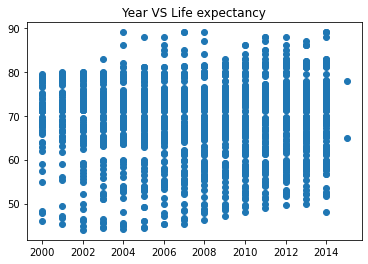

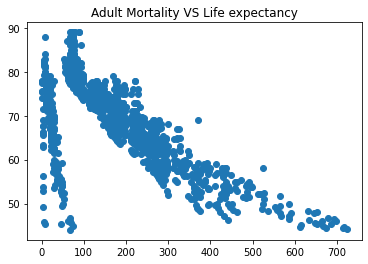

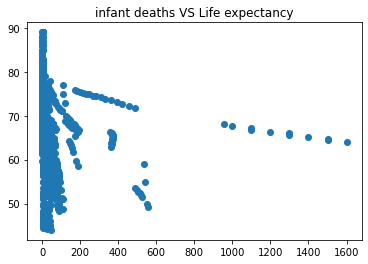

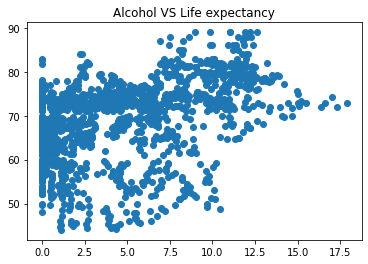

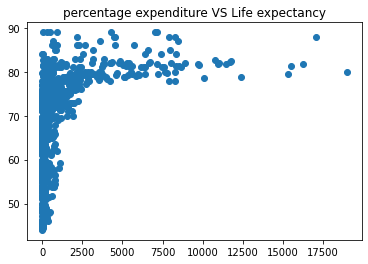

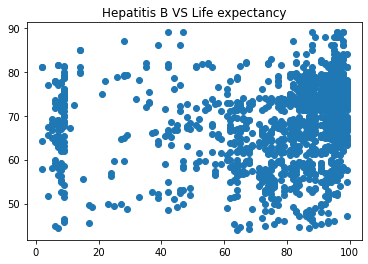

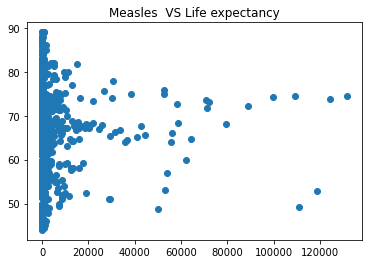

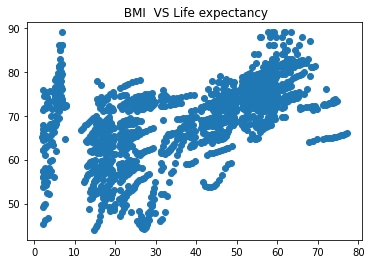

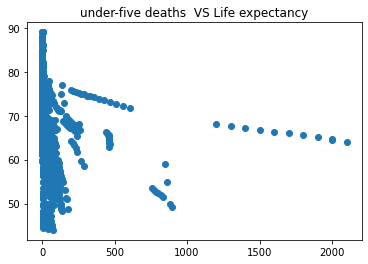

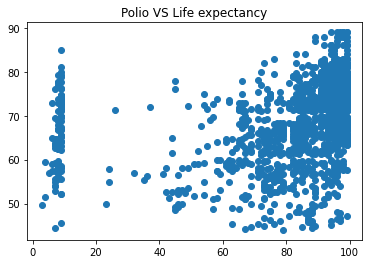

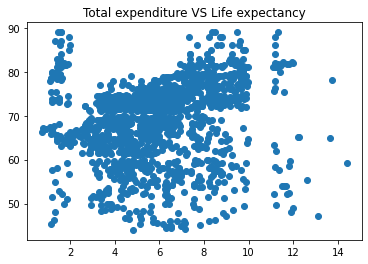

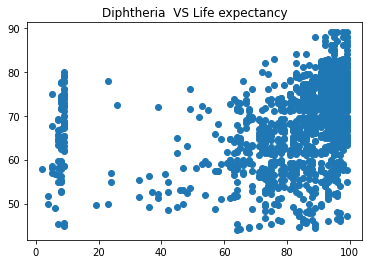

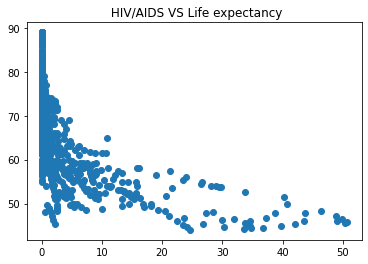

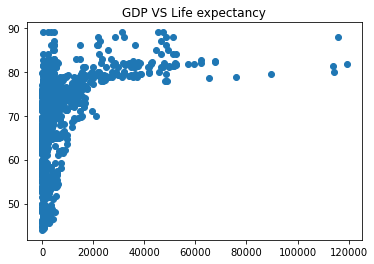

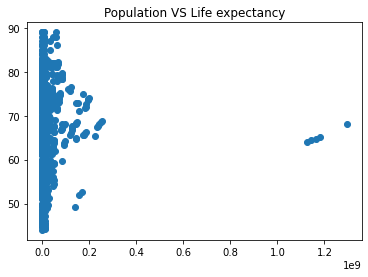

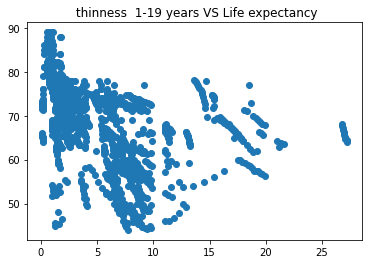

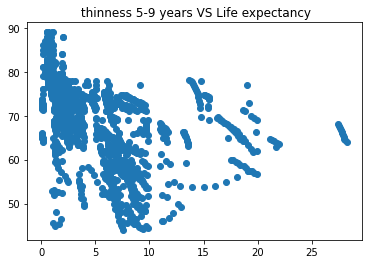

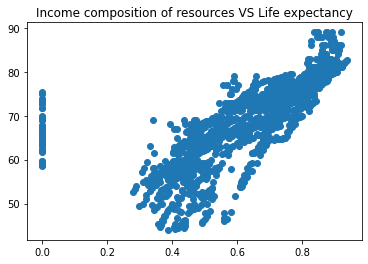

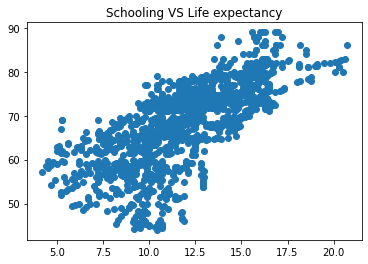

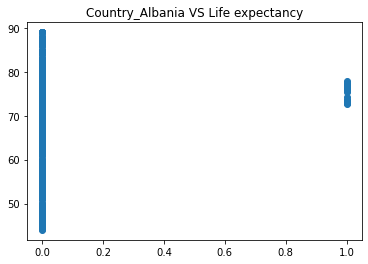

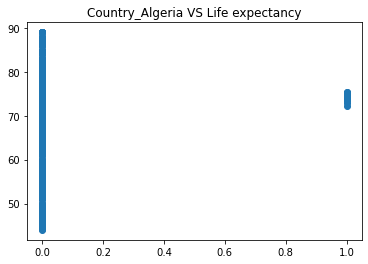

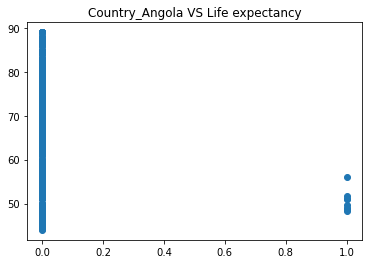

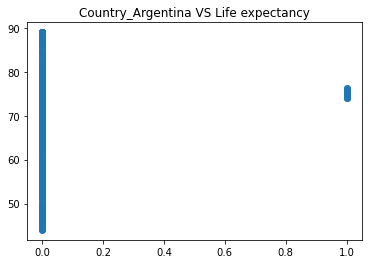

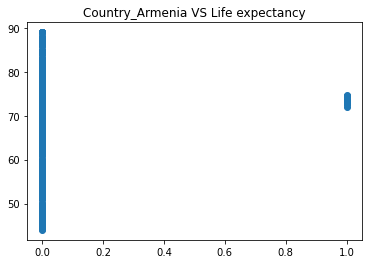

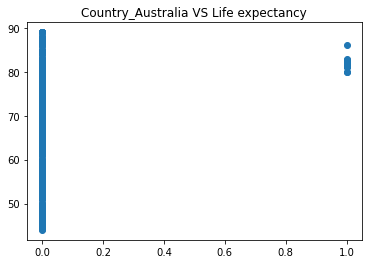

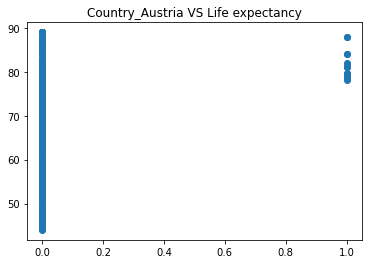

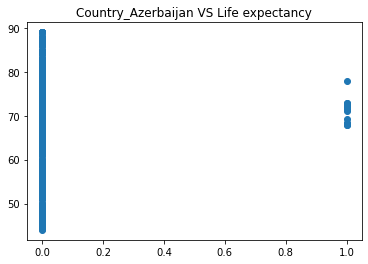

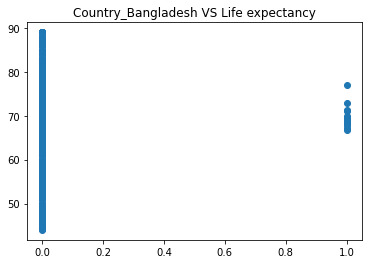

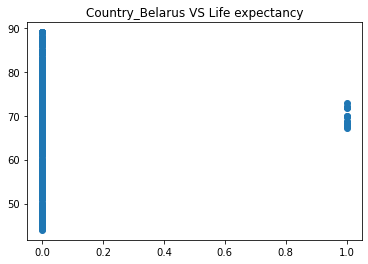

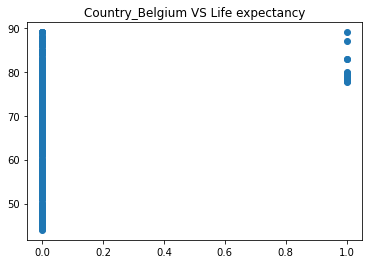

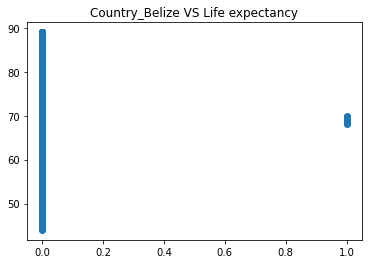

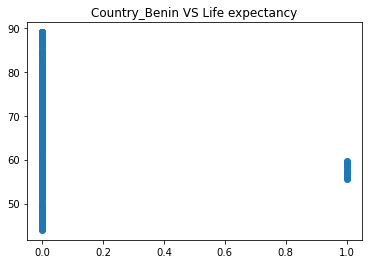

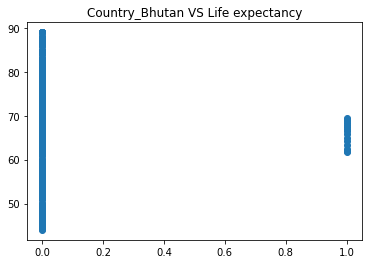

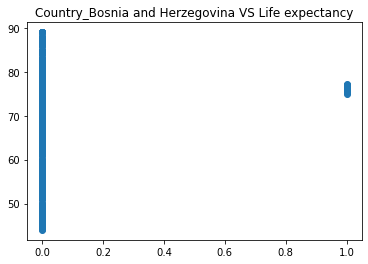

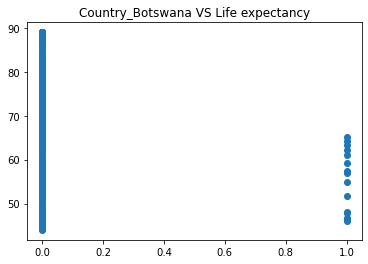

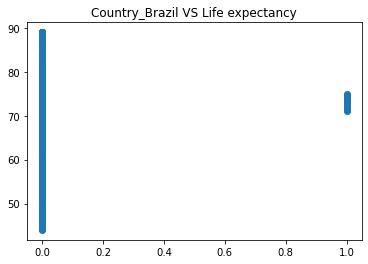

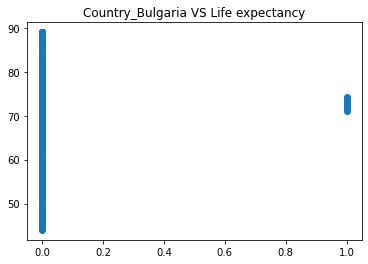

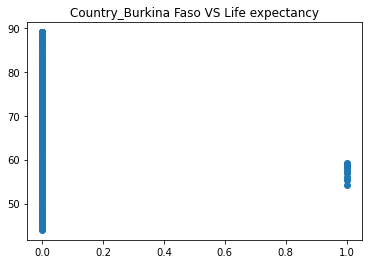

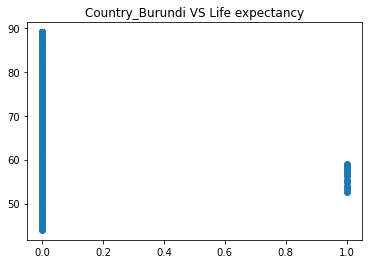

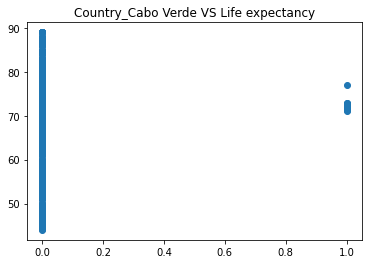

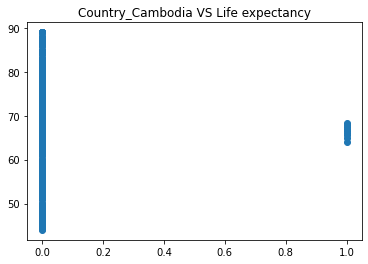

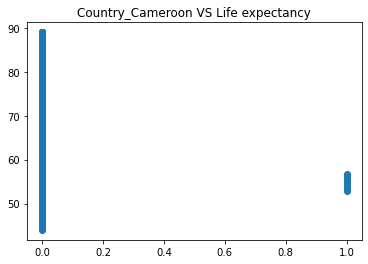

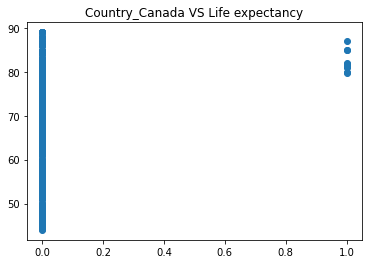

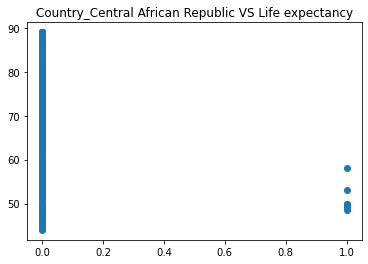

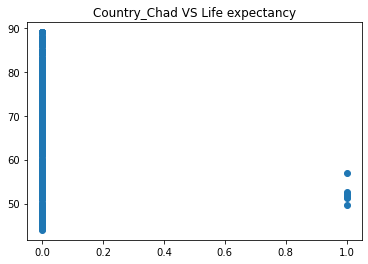

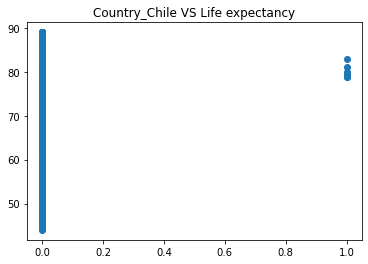

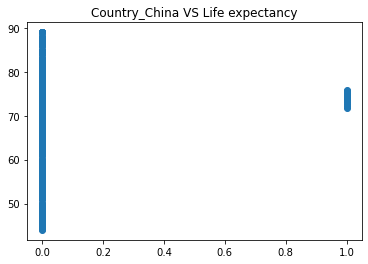

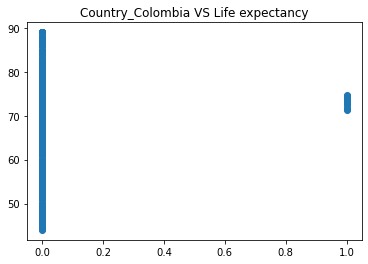

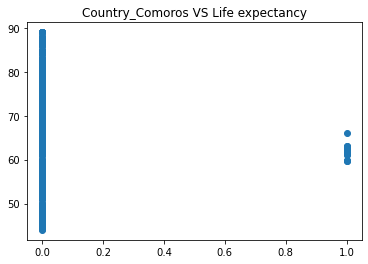

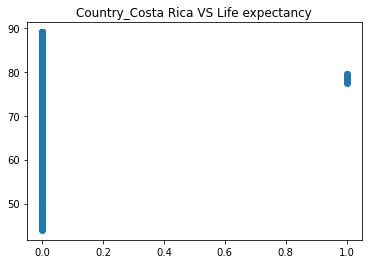

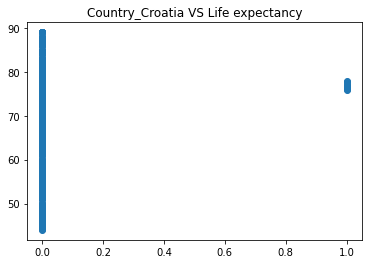

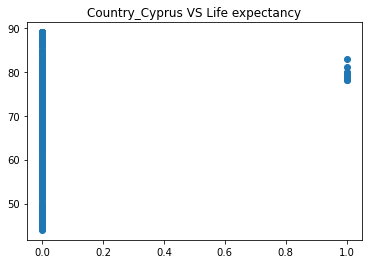

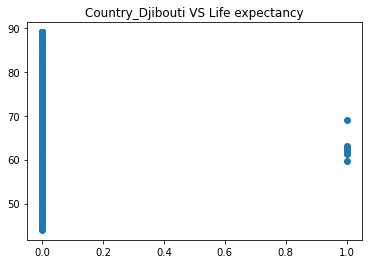

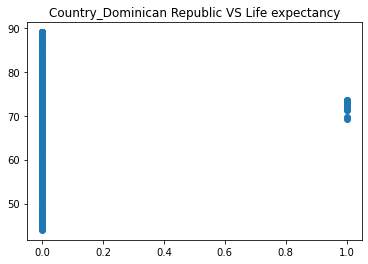

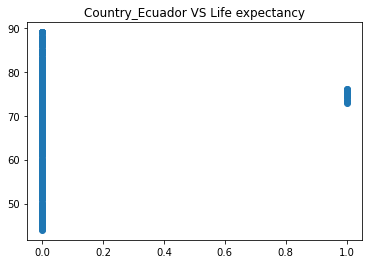

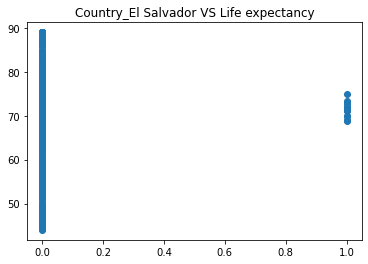

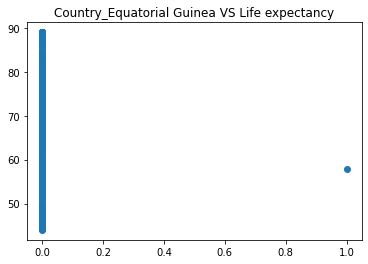

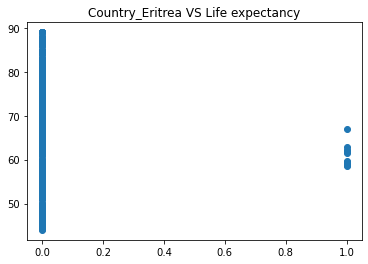

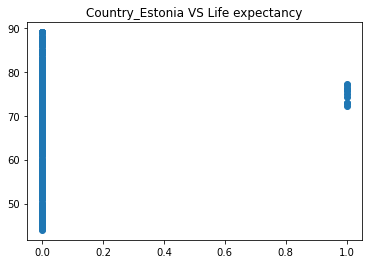

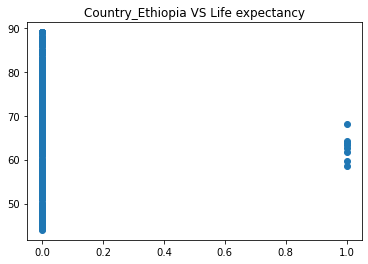

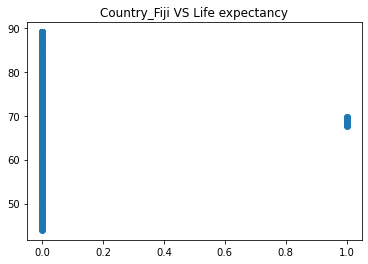

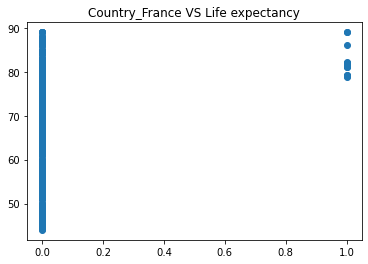

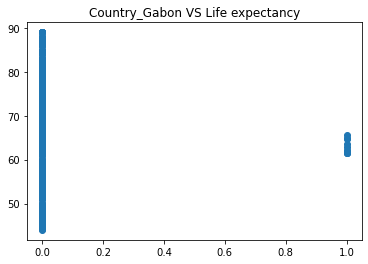

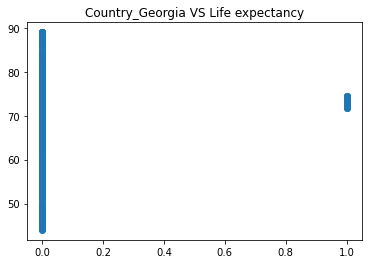

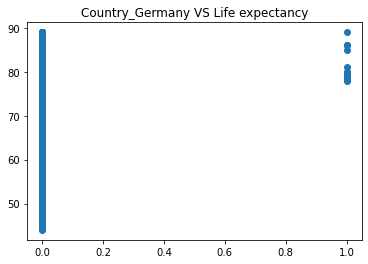

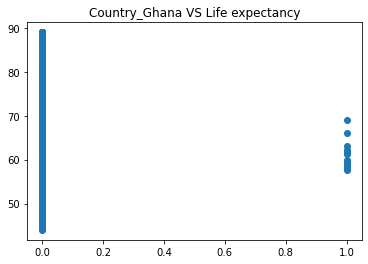

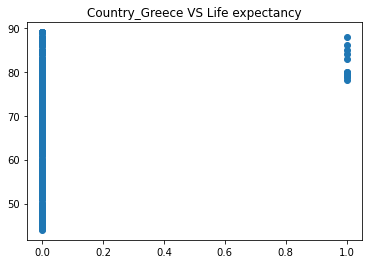

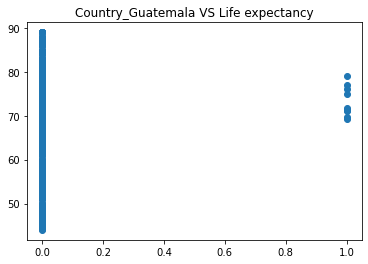

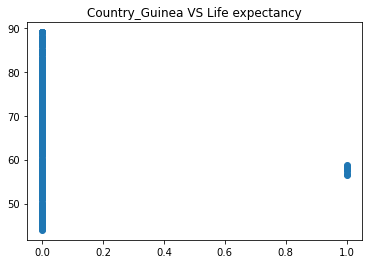

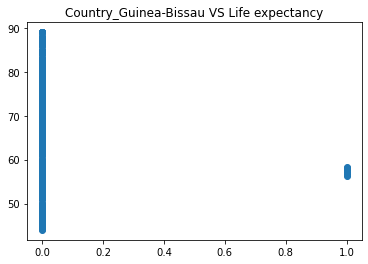

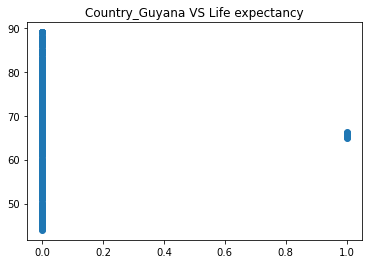

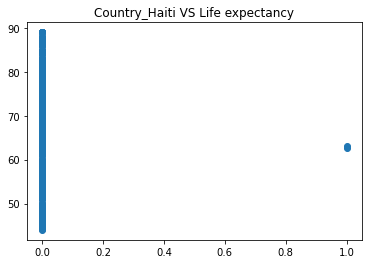

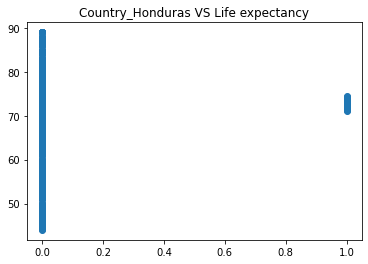

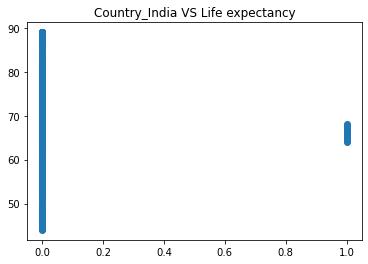

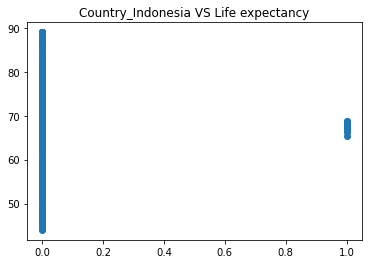

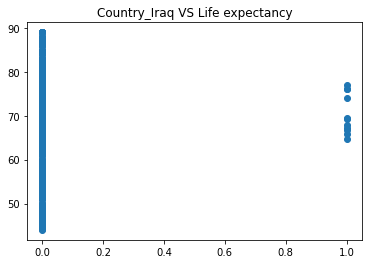

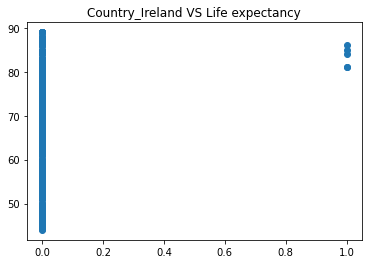

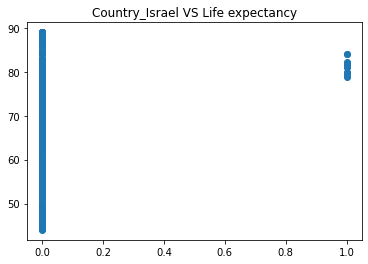

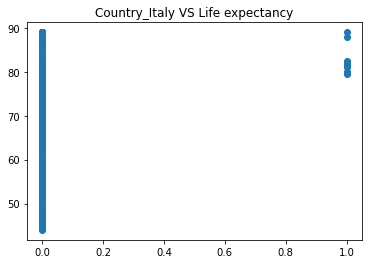

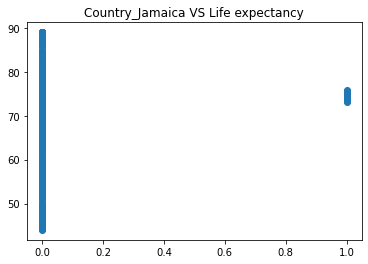

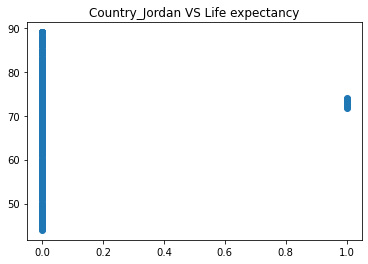

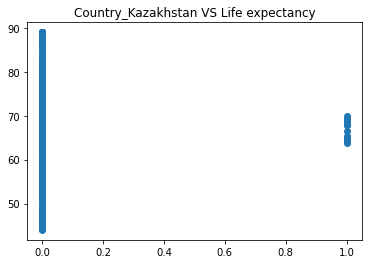

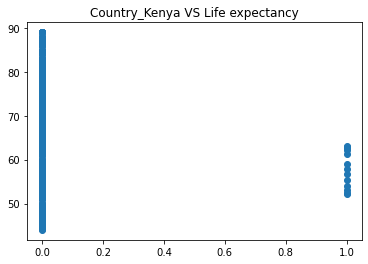

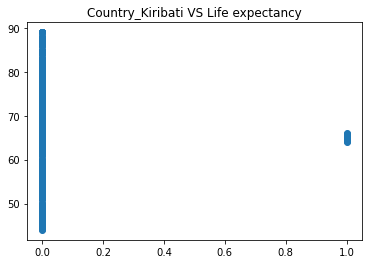

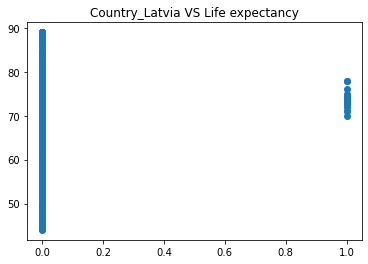

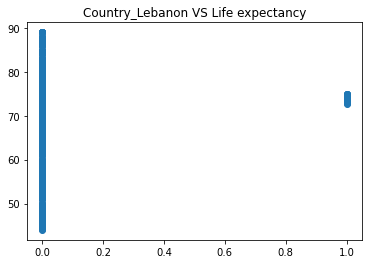

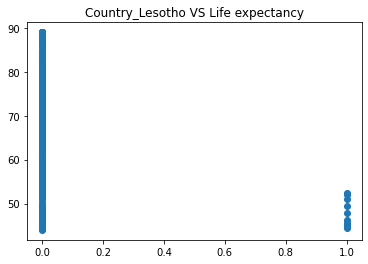

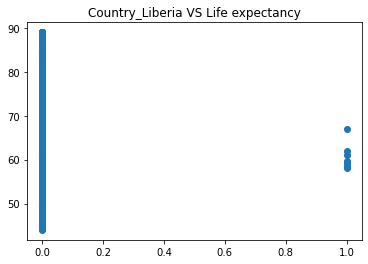

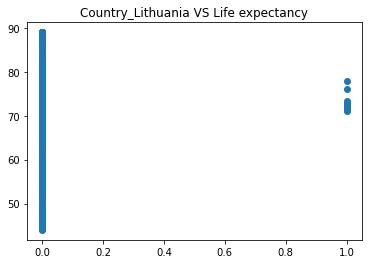

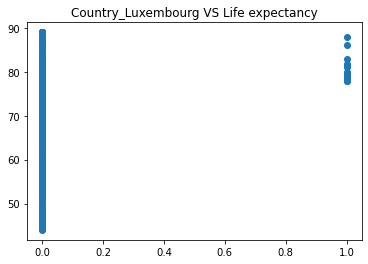

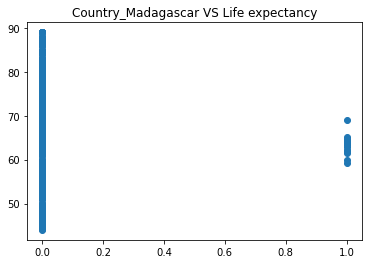

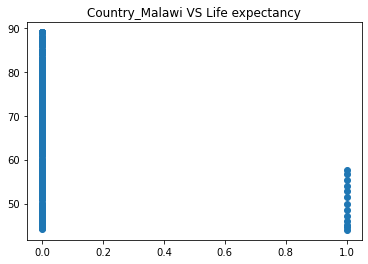

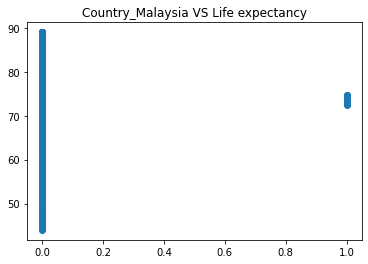

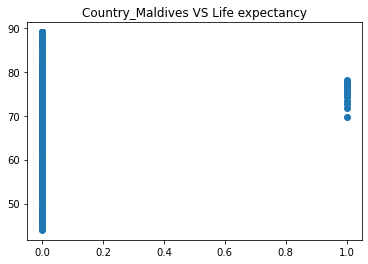

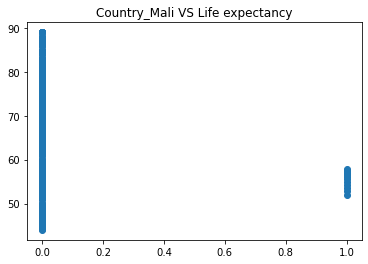

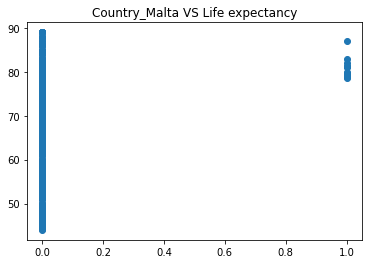

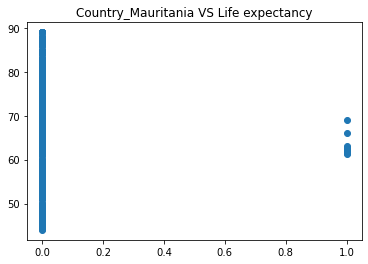

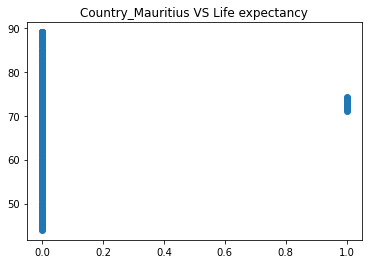

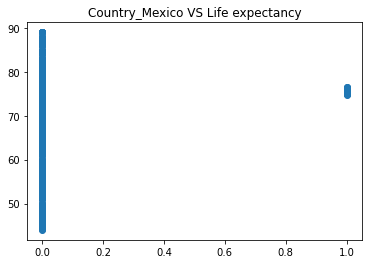

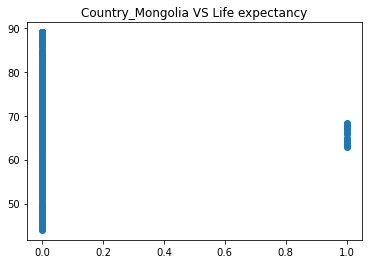

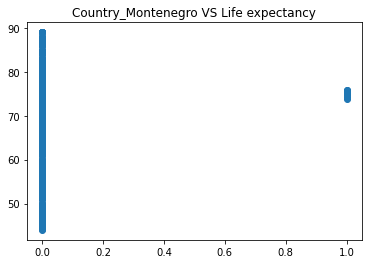

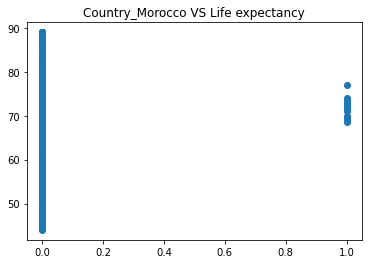

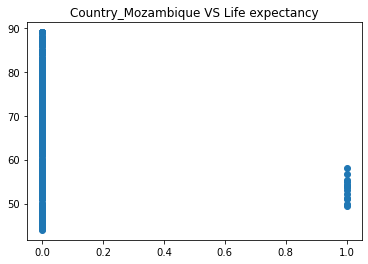

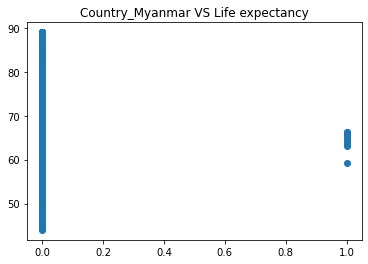

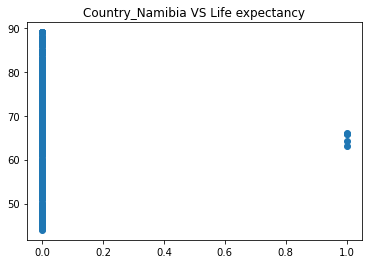

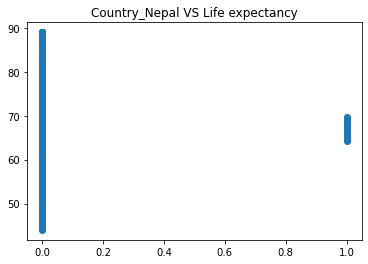

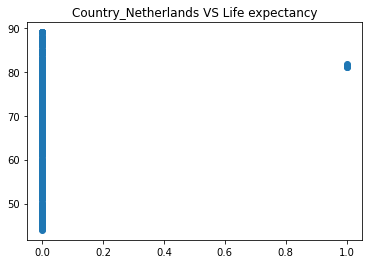

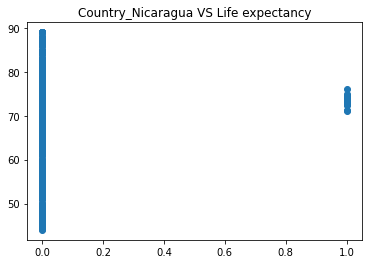

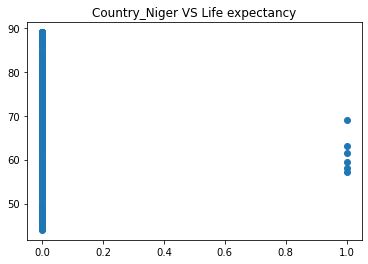

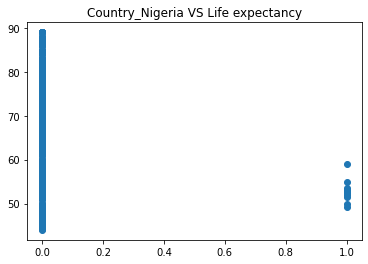

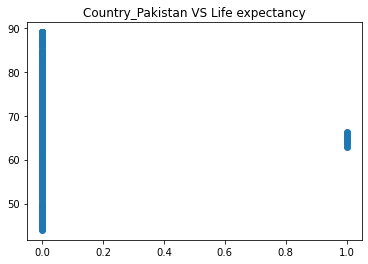

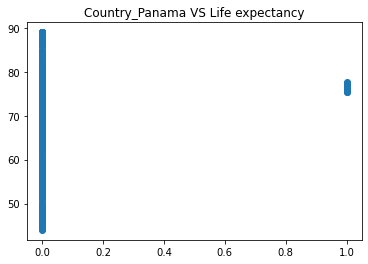

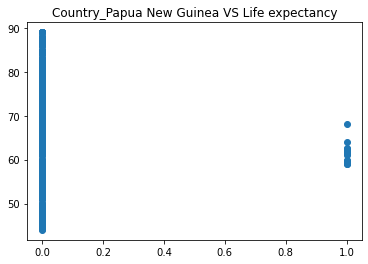

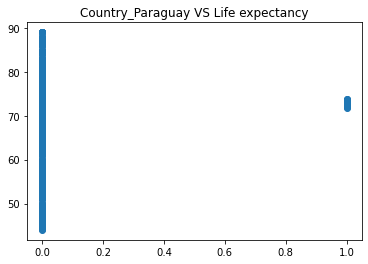

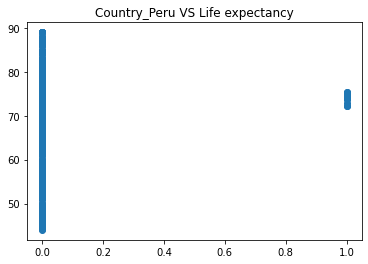

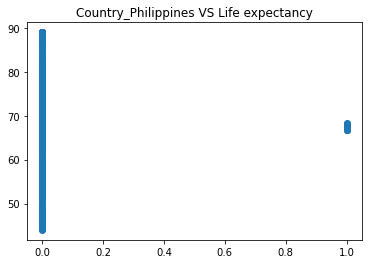

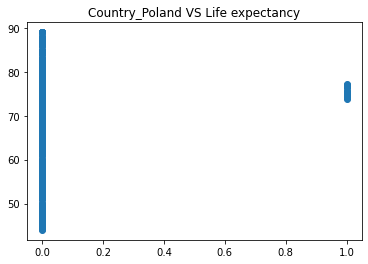

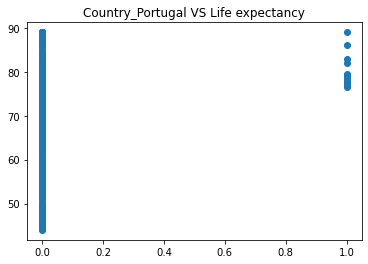

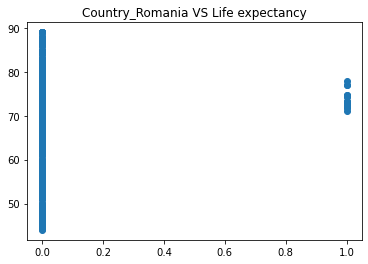

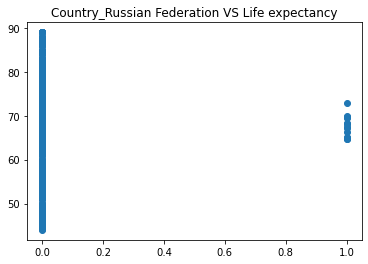

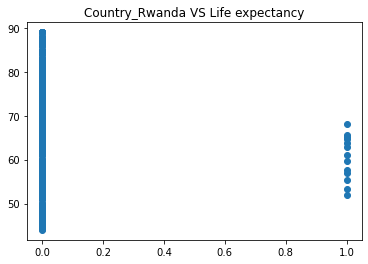

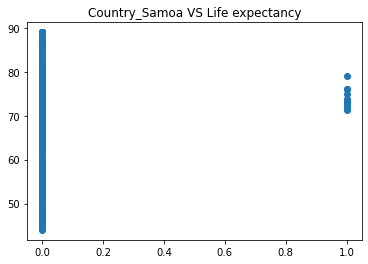

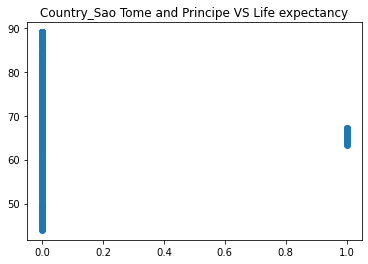

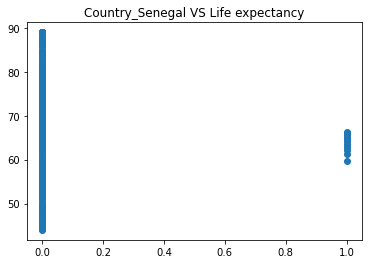

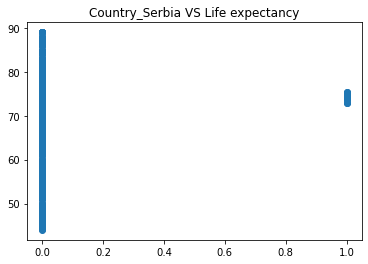

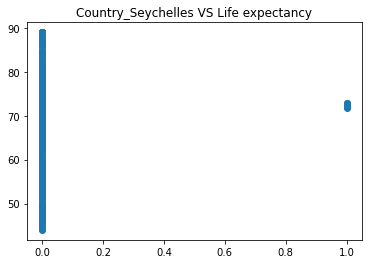

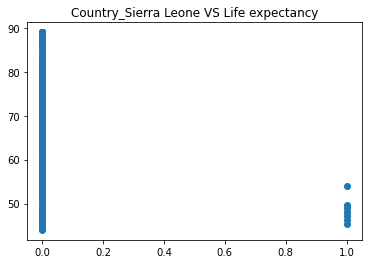

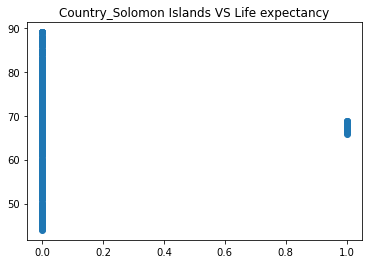

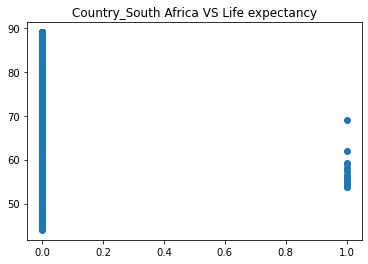

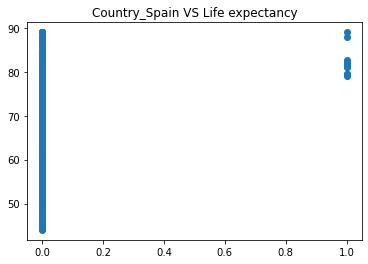

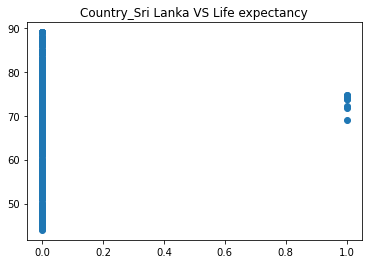

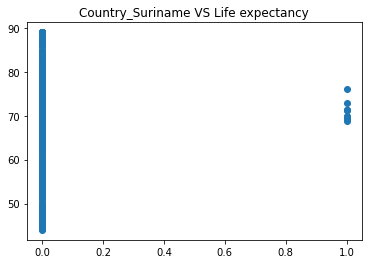

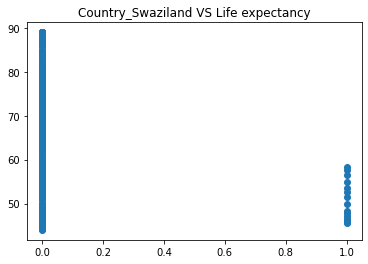

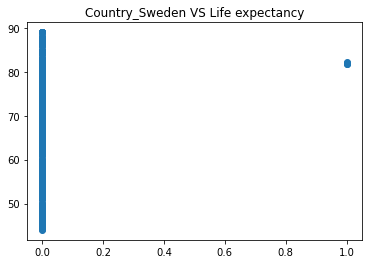

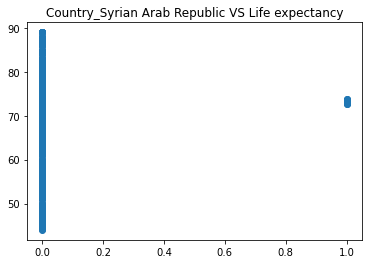

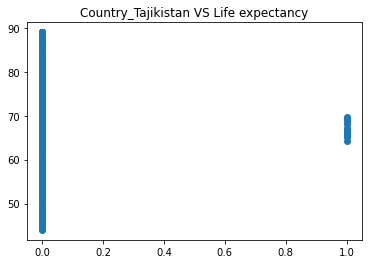

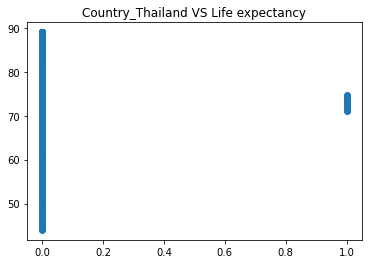

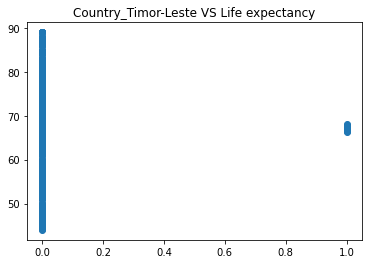

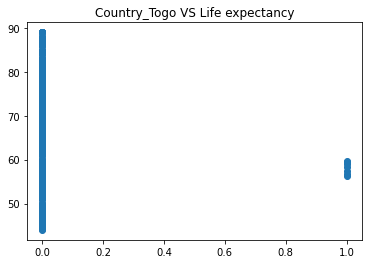

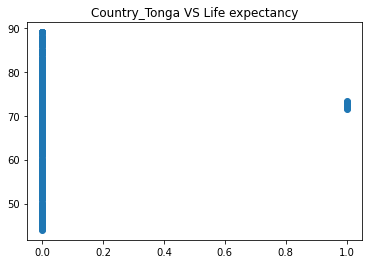

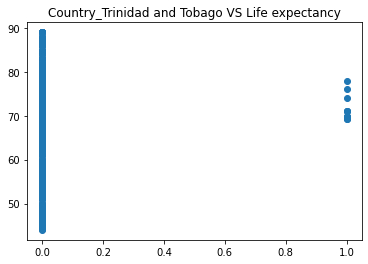

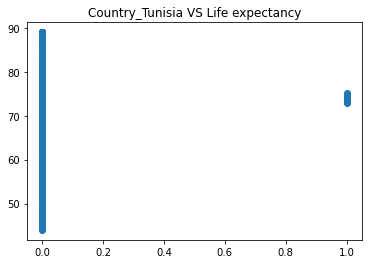

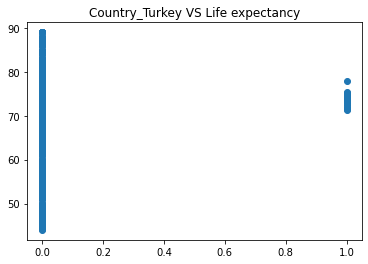

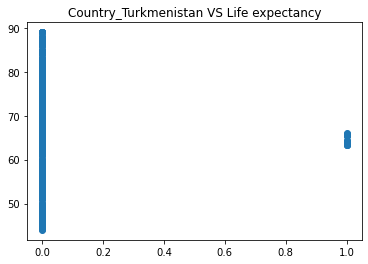

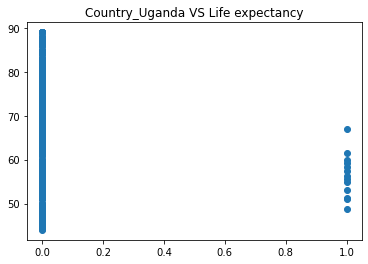

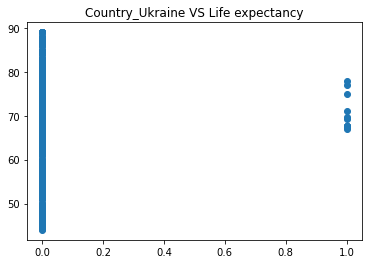

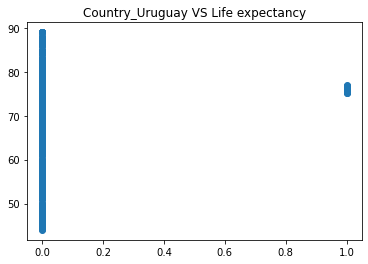

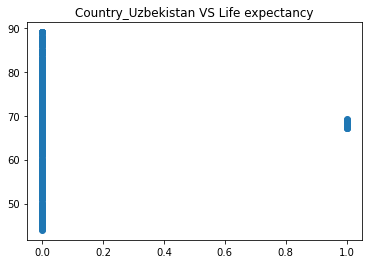

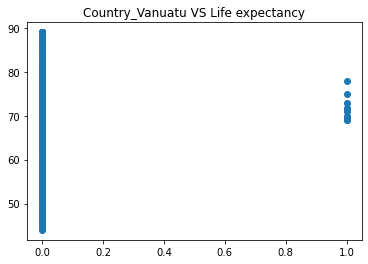

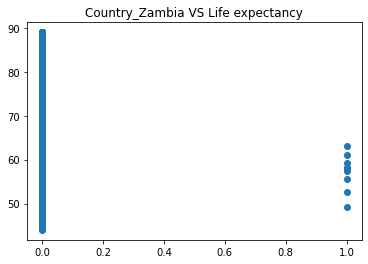

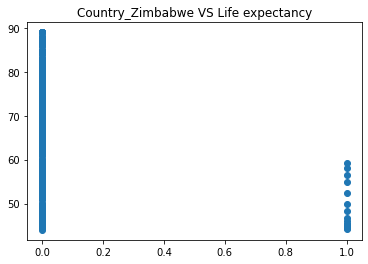

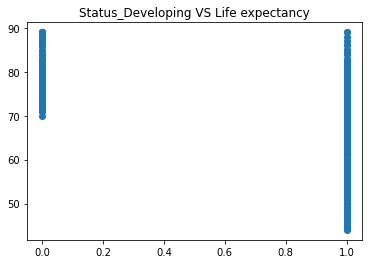

In [11]:
# from OLS model we can sortlist the p-values of independent variable and remove those columns.

#Assumption 1 linearity check

columns = list(X.columns)
c=1
for i in columns:
    plt.figure(figsize=(6,4))
    plt.scatter(X[i],Y)
    plt.title(i +' VS Life expectancy')
    c =c+1

<AxesSubplot:>

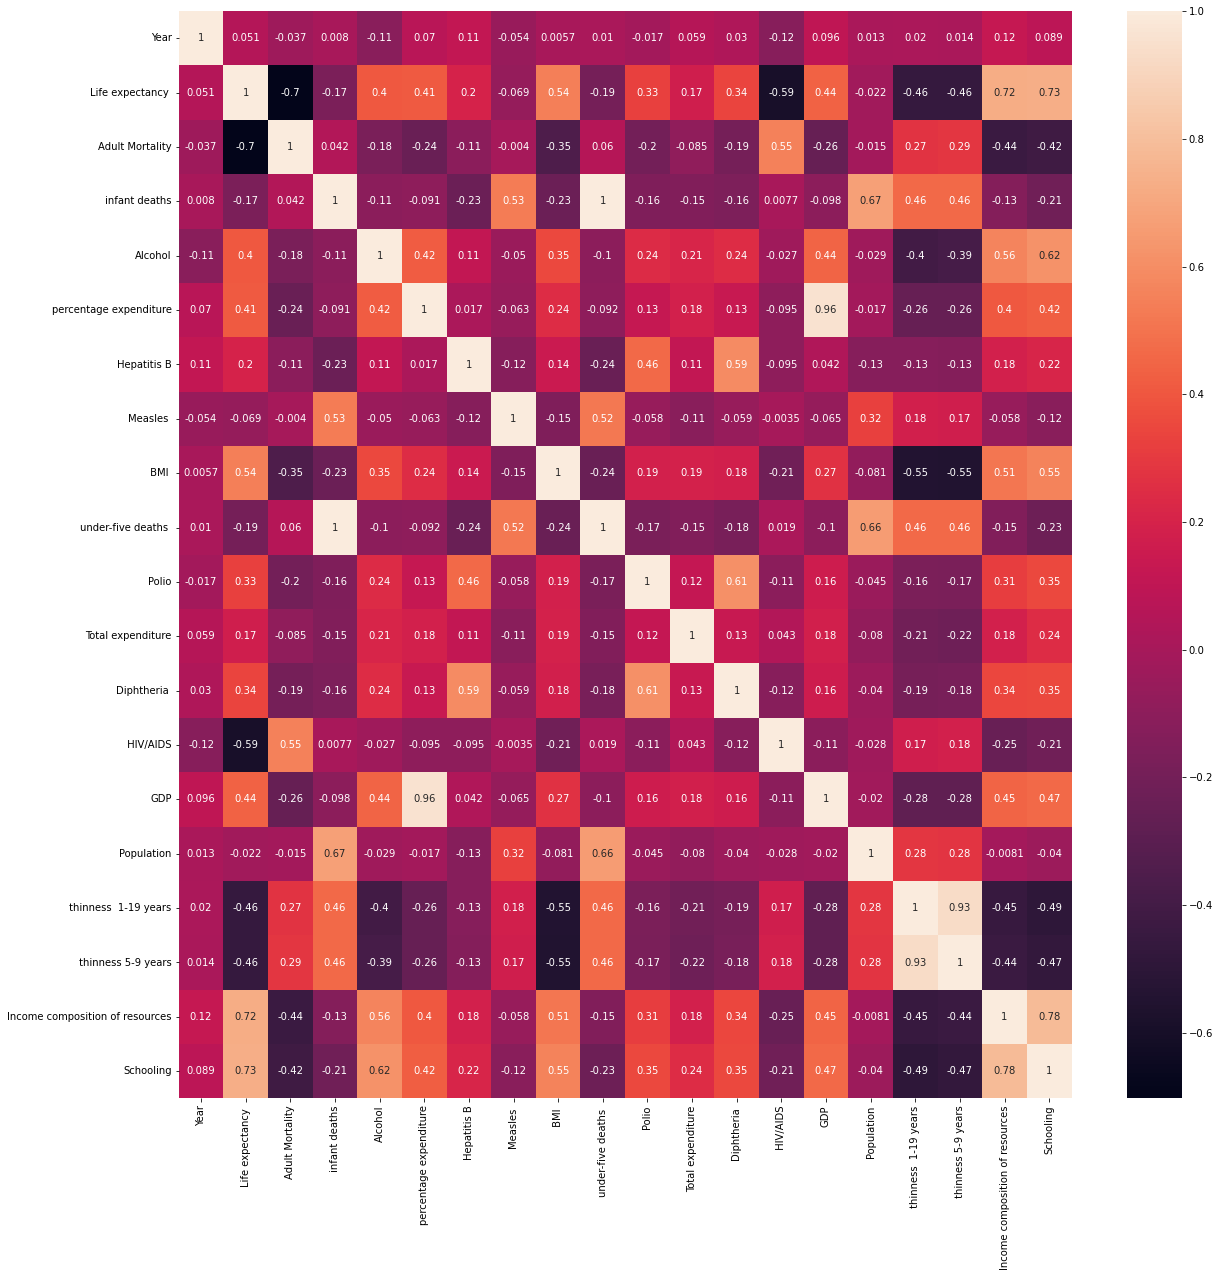

In [12]:
#Assumption 2 multi-collinearity test

X_copy = X_new.drop(['const'],axis =1)

plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)

In [13]:
# Calucate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_copy.values, i) for i in range(X_copy.shape[1])]
vif['Features'] = X_copy.columns

vif

,VIF,Features
0,2.971262,Year
1,2.733021,Adult Mortality
2,2087.193026,infant deaths
3,8.876957,Alcohol
4,27.530195,percentage expenditure
...,...,...
147,3.074967,Country_Uzbekistan
148,3.414421,Country_Vanuatu
149,2.304622,Country_Zambia
150,3.402966,Country_Zimbabwe


In [14]:
del_col_asper_vif = list(vif[vif['VIF']>=10]['Features'])
del_col_asper_vif

['infant deaths',
 'percentage expenditure',
 'under-five deaths ',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Schooling',
 'Country_Australia',
 'Country_Austria',
 'Country_Belgium',
 'Country_Bulgaria',
 'Country_Croatia',
 'Country_Cyprus',
 'Country_Germany',
 'Country_India',
 'Country_Ireland',
 'Country_Italy',
 'Country_Latvia',
 'Country_Lithuania',
 'Country_Luxembourg',
 'Country_Malta',
 'Country_Netherlands',
 'Country_Poland',
 'Country_Portugal',
 'Country_Romania',
 'Country_Spain',
 'Country_Sweden',
 'Status_Developing']

In [15]:
#F-Statistics

from sklearn.feature_selection import f_regression

p_value = f_regression(X_copy,Y)[1]
f_stats = f_regression(X_copy,Y)[0]

reg_summary = pd.DataFrame(data=X_copy.columns.values ,columns=['Features'])
reg_summary['f_stats']= f_stats.round(3)
reg_summary['p_value'] = p_value.round(3)

reg_summary

,Features,f_stats,p_value
0,Year,4.256,0.039
1,Adult Mortality,1604.976,0.000
2,infant deaths,48.467,0.000
3,Alcohol,318.821,0.000
4,percentage expenditure,332.085,0.000
...,...,...,...
147,Country_Uzbekistan,0.267,0.605
148,Country_Vanuatu,0.817,0.366
149,Country_Zambia,19.093,0.000
150,Country_Zimbabwe,81.372,0.000


In [16]:
#Get p=value from OLS model

p_values =results.pvalues.round(4)
p_values.drop('const', inplace=True)
reg_summary['ols_pvalue']=p_values
for i in range(len(p_values)):
    reg_summary['ols_pvalue'][i]= p_values[i]

C:\Users\Gabbar\AppData\Local\Temp\ipykernel_6884\609655705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_summary['ols_pvalue'][i]= p_values[i]


In [17]:
reg_summary

,Features,f_stats,p_value,ols_pvalue
0,Year,4.256,0.039,0.0000
1,Adult Mortality,1604.976,0.000,0.2326
2,infant deaths,48.467,0.000,0.0014
3,Alcohol,318.821,0.000,0.0317
4,percentage expenditure,332.085,0.000,0.5323
...,...,...,...,...
147,Country_Uzbekistan,0.267,0.605,0.0000
148,Country_Vanuatu,0.817,0.366,0.0000
149,Country_Zambia,19.093,0.000,0.1089
150,Country_Zimbabwe,81.372,0.000,0.3889


In [18]:
#Shortlist Columns Basedon OLS p-value

del_col_asper_pvalue = list(reg_summary[reg_summary['ols_pvalue']>=0.05]['Features'])
del_col_asper_pvalue

['Adult Mortality',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 'Income composition of resources',
 'Country_Benin',
 'Country_Burkina Faso',
 'Country_Burundi',
 'Country_Cameroon',
 'Country_Equatorial Guinea',
 'Country_Guinea',
 'Country_Guinea-Bissau',
 'Country_Mali',
 'Country_Mozambique',
 'Country_Nigeria',
 'Country_Togo',
 'Country_Zambia',
 'Country_Zimbabwe']

In [19]:
# OLS analysis after pvalue based removal

X_copy = X.copy()
X_pvalue_remove = X_copy.drop(del_col_asper_pvalue, axis=1)

ols_model = sm.OLS(Y,X_pvalue_remove)
results = ols_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     351.6
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:23:04   Log-Likelihood:                -3117.7
No. Observations:                1649   AIC:                             6489.
Df Residuals:                    1522   BIC:                             7176.
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Year                                 0.2308      0.014     16.016      0.000       0.202       0.259
infant deaths                        0.0414      0.012      3.510      0.000       0.018       0.065
Alcohol                             -0.0677      0.029     -2.337      0.020      -0.124      -0.011
under-five deaths                   -0.0309      0.008     -4.013      0.000      -0.046      -0.016
 HIV/AIDS                           -0.3116      0.013    -24.774      0.000      -0.336      -0.287
 thinness 5-9 years                  0.0805      0.022      3.582      0.000       0.036       0.125
Schooling                            0.3444      0.063      5.497      0.000       0.221       0.467
Country_Albania                     17.0721      0.537     31.815      0.000      16.020      18.125
Country_Algeria                     14.6724      0.608     24.142      0.000      13.480      15.865
Country_Angola                      -6.3495      0.630    -10.077      0.000      -7.585      -5.114
Country_Argentina                   15.6997      0.746     21.045      0.000      14.236      17.163
Country_Armenia                     15.3581      0.533     28.818      0.000      14.313      16.403
Country_Australia                 -387.5566     28.198    -13.744      0.000    -442.868    -332.245
Country_Austria                   -386.2379     28.378    -13.610      0.000    -441.902    -330.574
Country_Azerbaijan                  12.8100      0.541     23.677      0.000      11.749      13.871
Country_Bangladesh                  11.4160      0.578     19.759      0.000      10.283      12.549
Country_Belarus                     11.4334      0.706     16.194      0.000      10.049      12.818
Country_Belgium                   -387.5367     28.315    -13.687      0.000    -443.078    -331.996
Country_Belize                      11.1408      0.556     20.043      0.000      10.051      12.231
Country_Bhutan                       7.1130      0.530     13.432      0.000       6.074       8.152
Country_Bosnia and Herzegovina      17.2720      0.623     27.733      0.000      16.050      18.494
Country_Botswana                     2.3658      0.517      4.573      0.000       1.351       3.381
Country_Brazil                      14.2343      0.658     21.647      0.000      12.944      15.524
Country_Bulgaria                  -394.5115     28.439    -13.872      0.000    -450.295    -338.728
Country_Cabo Verde                  13.9168      0.551     25.259      0.000      12.836      14.997
Country_Cambodia                     7.3694      0.598     12.321      0.000       6.196       8.543
Country_Canada                      22.9445      0.726     31.593      0.000      21.520      24.369
Country_Central African Republic    -4.7943      0.71

In [20]:
# OLS analysis after VIF based removal

X_copy = X.copy()
X_vif_remove = X_copy.drop(del_col_asper_vif , axis=1)

ols_model = sm.OLS(Y,X_vif_remove)
results = ols_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9806.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):                        0.00
Time:                        23:23:04   Log-Likelihood:                         -3832.5
No. Observations:                1649   AIC:                                      7913.
Df Residuals:                    1525   BIC:                                      8584.
Df Model:                         124                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Year                                 0.0302      0.000     79.940      0.000       0.029       0.031
Adult Mortality                     -0.0058      0.001     -7.099      0.000      -0.007      -0.004
Alcohol                              0.2985      0.036      8.334      0.000       0.228       0.369
Hepatitis B                          0.0019      0.004      0.548      0.584      -0.005       0.009
Measles                          -2.849e-05   9.52e-06     -2.993      0.003   -4.72e-05   -9.82e-06
 BMI                                 0.0248      0.005      4.936      0.000       0.015       0.035
Polio                                0.0114      0.004      2.890      0.004       0.004       0.019
Total expenditure                    0.0646      0.038      1.706      0.088      -0.010       0.139
Diphtheria                           0.0078      0.005      1.721      0.085      -0.001       0.017
 HIV/AIDS                           -0.3489      0.023    -14.926      0.000      -0.395      -0.303
Population                       -1.764e-09   1.06e-09     -1.671      0.095   -3.84e-09    3.07e-10
Income composition of resources     13.4049      0.760     17.634      0.000      11.914      14.896
Country_Albania                      0.2625      0.693      0.379      0.705      -1.097       1.622
Country_Algeria                      1.2157      0.861      1.412      0.158      -0.473       2.905
Country_Angola                     -17.9120      0.977    -18.325      0.000     -19.829     -15.995
Country_Argentina                   -1.4735      0.734     -2.007      0.045      -2.914      -0.033
Country_Armenia                     -0.2023      0.722     -0.280      0.779      -1.618       1.213
Country_Azerbaijan                  -1.5311      0.796     -1.925      0.054      -3.092       0.029
Country_Bangladesh                   0.9423      0.862      1.093      0.275      -0.749       2.633
Country_Belarus                     -7.0678      0.708     -9.979      0.000      -8.457      -5.679
Country_Belize                      -4.8269      0.704     -6.859      0.000      -6.207      -3.446
Country_Benin                       -9.0478      0.827    -10.944      0.000     -10.669      -7.426
Country_Bhutan                       1.9743      0.867      2.278      0.023       0.274       3.675
Country_Bosnia and Herzegovina       3.3214      0.826      4.020      0.000       1.701       4.942
Country_Botswana                    -9.3096      0.848    -10.984      0.000     -10.972      -7.647
Country_Brazil                      -1.5669      0.695     -2.254      0.024      -2.931      -0.203
Country_Burkina Faso                -9.9151      0.940 

In [21]:
#With all features 
X_copy = X_new.drop(['const'],axis =1)

X_train, X_test, y_train, y_test = train_test_split(X_copy, Y, test_size=0.20, random_state=42)
Lr_model1 = LinearRegression()

Lr_model1.fit(X_train,y_train)

prediction = Lr_model1.predict(X_test)

RESULTS = pd.DataFrame()

RESULTS['Actual_Value']= y_test
RESULTS['Pred_with_allFeature']= prediction
print('Model 1 with No Filter : ', r2_score(y_test,prediction))


#After p-values based removed features
X_train, X_test, y_train, y_test = train_test_split(X_pvalue_remove, Y, test_size=0.20, random_state=42)

Lr_model2 = LinearRegression()

Lr_model2.fit(X_train,y_train)

predictions = Lr_model2.predict(X_test)

RESULTS['Pred_aft_pvalue_based_select']= predictions
print('Model 2 with filter via p-value : ', r2_score(y_test,predictions))


#After VIF based removed features
X_train, X_test, y_train, y_test = train_test_split(X_vif_remove, Y, test_size=0.20, random_state=42)
Lr_model3 = LinearRegression()

Lr_model3.fit(X_train,y_train)

pred = Lr_model3.predict(X_test)

RESULTS['Pred_aft_vif_based_select']= pred
print('Model 3 with filter via VIF : ', r2_score(y_test,pred))

RESULTS

Model 1 with No Filter :  0.9487694667792786
Model 2 with filter via p-value :  0.9505178900951401
Model 3 with filter via VIF :  0.9146098587821777


,Actual_Value,Pred_with_allFeature,Pred_aft_pvalue_based_select,Pred_aft_vif_based_select
682,67.5,67.622252,67.136712,67.748788
1319,73.8,73.828693,73.668505,73.411802
576,79.1,80.134578,80.107608,78.351718
1637,54.9,53.558812,54.250402,55.006540
331,48.6,50.463784,50.431349,51.247180
...,...,...,...,...
816,71.0,72.534460,72.425903,76.663927
1591,75.4,75.173690,75.284744,75.328716
306,55.9,56.594906,57.610468,53.741835
192,69.1,68.296904,68.129373,71.393194


In [22]:
# Removal of Outliers

from scipy import stats
indexes = {}
l =[]
z = []
columns = list(X.columns)
for i in columns:
    z = np.abs(stats.zscore(X[i]))
    indexes[i]=list(np.where(z>12))
    for i in range(len(np.where(z>12)[0])):
        l.append(np.where(z>12)[0][i])
    
indexes

{'Year': [array([], dtype=int64)],
 'Adult Mortality': [array([], dtype=int64)],
 'infant deaths': [array([672, 673, 674], dtype=int64)],
 'Alcohol': [array([], dtype=int64)],
 'percentage expenditure': [array([], dtype=int64)],
 'Hepatitis B': [array([], dtype=int64)],
 'Measles ': [array([354, 357], dtype=int64)],
 ' BMI ': [array([], dtype=int64)],
 'under-five deaths ': [array([672, 673, 674], dtype=int64)],
 'Polio': [array([], dtype=int64)],
 'Total expenditure': [array([], dtype=int64)],
 'Diphtheria ': [array([], dtype=int64)],
 ' HIV/AIDS': [array([], dtype=int64)],
 'GDP': [array([], dtype=int64)],
 'Population': [array([664, 671, 672, 673, 674], dtype=int64)],
 ' thinness  1-19 years': [array([], dtype=int64)],
 ' thinness 5-9 years': [array([], dtype=int64)],
 'Income composition of resources': [array([], dtype=int64)],
 'Schooling': [array([], dtype=int64)],
 'Country_Albania': [array([], dtype=int64)],
 'Country_Algeria': [array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42

In [23]:
#Easy way to remove duplicates from list

print("Size of index_list before duplicate removal : ",len(l))
l = set(l)
l = list(l)
print("Size of index_list After duplicate removal : ",len(l))

Size of index_list before duplicate removal :  340
Size of index_list After duplicate removal :  329


In [24]:
# Removal of outliers

X_outlier_rmv = X.copy()
Y_outlier_rmv = Y.copy()
X_outlier_rmv.drop(l,axis =0, inplace= True)
Y_outlier_rmv.drop(l,axis=0, inplace =True)

In [25]:
X_outlier_rmv.reset_index(drop=True)

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,0,0,0,0,0,0,0,0,1,1
1316,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,0,0,0,0,0,0,0,0,1,1
1317,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,0,0,0,0,0,0,0,0,1,1
1318,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,0,0,0,0,0,0,0,0,1,1


In [26]:
Y_outlier_rmv.reset_index(drop=True)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
1315    44.3
1316    44.5
1317    44.8
1318    45.3
1319    46.0
Name: Life expectancy , Length: 1320, dtype: float64

In [27]:

X_outlier_rmv.drop(del_col_asper_pvalue, axis=1, inplace=True)
ols_model = sm.OLS(Y_outlier_rmv,X_outlier_rmv)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     372.7
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:23:05   Log-Likelihood:                -2435.3
No. Observations:                1320   AIC:                             5063.
Df Residuals:                    1224   BIC:                             5560.
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Year                                 0.2410      0.015     15.959      0.000       0.211       0.271
infant deaths                        0.1965      0.026      7.439      0.000       0.145       0.248
Alcohol                             -0.0523      0.037     -1.422      0.155      -0.125       0.020
under-five deaths                   -0.1544      0.020     -7.671      0.000      -0.194      -0.115
 HIV/AIDS                           -0.3067      0.013    -24.335      0.000      -0.331      -0.282
 thinness 5-9 years                  0.0623      0.023      2.698      0.007       0.017       0.108
Schooling                            0.1393      0.078      1.785      0.074      -0.014       0.292
Country_Albania                     16.2706      0.607     26.810      0.000      15.080      17.461
Country_Algeria                   7.532e-12   6.02e-13     12.520      0.000    6.35e-12    8.71e-12
Country_Angola                     5.29e-12   5.54e-13      9.552      0.000     4.2e-12    6.38e-12
Country_Argentina                   15.5783      0.844     18.464      0.000      13.923      17.234
Country_Armenia                     14.4617      0.600     24.093      0.000      13.284      15.639
Country_Australia                 -404.1161     29.406    -13.743      0.000    -461.808    -346.424
Country_Austria                   -403.7629     29.636    -13.624      0.000    -461.907    -345.619
Country_Azerbaijan                  11.8675      0.599     19.806      0.000      10.692      13.043
Country_Bangladesh                  10.9204      0.634     17.224      0.000       9.676      12.164
Country_Belarus                     11.0534      0.812     13.611      0.000       9.460      12.647
Country_Belgium                   -404.6843     29.556    -13.692      0.000    -462.670    -346.698
Country_Belize                      10.4054      0.627     16.608      0.000       9.176      11.635
Country_Bhutan                       6.2609      0.576     10.870      0.000       5.131       7.391
Country_Bosnia and Herzegovina    1.115e-11   8.75e-13     12.735      0.000    9.43e-12    1.29e-11
Country_Botswana                     1.6706      0.563      2.968      0.003       0.566       2.775
Country_Brazil                      12.7464      0.784     16.256      0.000      11.208      14.285
Country_Bulgaria                  -412.3939     29.712    -13.880      0.000    -470.685    -354.102
Country_Cabo Verde                  13.2587      0.605     21.900      0.000      12.071      14.446
Country_Cambodia                  2.168e-13   2.95e-13      0.736      0.462   -3.61e-13    7.95e-13
Country_Canada                      22.7477      0.815     27.925      0.000      21.150      24.346
Country_Central African Republic  9.244e-13   2.84e-1

In [28]:
RESULTS

,Actual_Value,Pred_with_allFeature,Pred_aft_pvalue_based_select,Pred_aft_vif_based_select
682,67.5,67.622252,67.136712,67.748788
1319,73.8,73.828693,73.668505,73.411802
576,79.1,80.134578,80.107608,78.351718
1637,54.9,53.558812,54.250402,55.006540
331,48.6,50.463784,50.431349,51.247180
...,...,...,...,...
816,71.0,72.534460,72.425903,76.663927
1591,75.4,75.173690,75.284744,75.328716
306,55.9,56.594906,57.610468,53.741835
192,69.1,68.296904,68.129373,71.393194


In [29]:
METRIC = pd.DataFrame()
METRIC['Model']= 'Model 1 : All Feature','Model 2 : p-Value Removed','Model 3 : vif Removed','Model 4 : Lasso','Model 5 : LassoCV'

In [30]:
r2_score(RESULTS['Actual_Value'],RESULTS['Pred_with_allFeature'])

0.9487694667792786

In [31]:
model_lasso = Lasso(alpha =1)

model_lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [32]:
Pred_lasso = model_lasso.predict(X_test)

In [33]:
RESULTS['Pred_Lasso'] = Pred_lasso

In [34]:
RESULTS

,Actual_Value,Pred_with_allFeature,Pred_aft_pvalue_based_select,Pred_aft_vif_based_select,Pred_Lasso
682,67.5,67.622252,67.136712,67.748788,67.491644
1319,73.8,73.828693,73.668505,73.411802,75.003632
576,79.1,80.134578,80.107608,78.351718,77.638072
1637,54.9,53.558812,54.250402,55.006540,56.754422
331,48.6,50.463784,50.431349,51.247180,53.391580
...,...,...,...,...,...
816,71.0,72.534460,72.425903,76.663927,78.517501
1591,75.4,75.173690,75.284744,75.328716,74.705943
306,55.9,56.594906,57.610468,53.741835,59.835472
192,69.1,68.296904,68.129373,71.393194,65.911540


In [35]:
from sklearn.model_selection import RepeatedKFold
cross_validation = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)
lasso_model2 = LassoCV(alphas = np.arange(0.01,1,0.02),n_jobs=-1,cv = cross_validation)

lasso_model2.fit(X_train,y_train)

print("Best Alpha is : ", lasso_model2.alpha_)

Pred_LassoCV = lasso_model2.predict(X_test)

RESULTS['Pred_LassoCV'] = Pred_LassoCV

Best Alpha is :  0.01


In [36]:
RESULTS

,Actual_Value,Pred_with_allFeature,Pred_aft_pvalue_based_select,Pred_aft_vif_based_select,Pred_Lasso,Pred_LassoCV
682,67.5,67.622252,67.136712,67.748788,67.491644,68.415308
1319,73.8,73.828693,73.668505,73.411802,75.003632,74.797039
576,79.1,80.134578,80.107608,78.351718,77.638072,78.604967
1637,54.9,53.558812,54.250402,55.006540,56.754422,57.498611
331,48.6,50.463784,50.431349,51.247180,53.391580,53.975104
...,...,...,...,...,...,...
816,71.0,72.534460,72.425903,76.663927,78.517501,77.673418
1591,75.4,75.173690,75.284744,75.328716,74.705943,75.622492
306,55.9,56.594906,57.610468,53.741835,59.835472,55.312800
192,69.1,68.296904,68.129373,71.393194,65.911540,71.739320


In [37]:
METRIC['MSE'] = mean_squared_error(RESULTS['Actual_Value'],RESULTS['Pred_with_allFeature']),mean_squared_error(RESULTS['Actual_Value'],RESULTS['Pred_aft_pvalue_based_select']),mean_squared_error(RESULTS['Actual_Value'],RESULTS['Pred_aft_vif_based_select']),mean_squared_error(RESULTS['Actual_Value'],RESULTS['Pred_Lasso']),mean_squared_error(RESULTS['Actual_Value'],RESULTS['Pred_LassoCV'])
            
        
METRIC['RMSE'] = mean_squared_error(RESULTS['Actual_Value'],RESULTS['Pred_with_allFeature'], squared=False),mean_squared_error(RESULTS['Actual_Value'],RESULTS['Pred_aft_pvalue_based_select'], squared=False),mean_squared_error(RESULTS['Actual_Value'],RESULTS['Pred_aft_vif_based_select'], squared=False),mean_squared_error(RESULTS['Actual_Value'],RESULTS['Pred_Lasso'], squared=False),mean_squared_error(RESULTS['Actual_Value'],RESULTS['Pred_LassoCV'], squared=False)
            
        
METRIC['R-Squared'] = r2_score(RESULTS['Actual_Value'],RESULTS['Pred_with_allFeature']), r2_score(RESULTS['Actual_Value'],RESULTS['Pred_aft_pvalue_based_select']), r2_score(RESULTS['Actual_Value'],RESULTS['Pred_aft_vif_based_select']), r2_score(RESULTS['Actual_Value'],RESULTS['Pred_Lasso']), r2_score(RESULTS['Actual_Value'],RESULTS['Pred_LassoCV'])
        
METRIC

,Model,MSE,RMSE,R-Squared
0,Model 1 : All Feature,3.638520,1.907490,0.948769
1,Model 2 : p-Value Removed,3.514342,1.874658,0.950518
2,Model 3 : vif Removed,6.064620,2.462645,0.914610
3,Model 4 : Lasso,20.101362,4.483454,0.716972
4,Model 5 : LassoCV,7.697333,2.774407,0.891621


In [38]:
X_scaled = X_pvalue_remove.copy()

In [39]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(X_scaled)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [41]:
lr_model.score(X_train,y_train)

0.9691273038076985

0.94902749362595

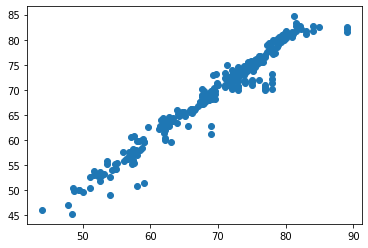

In [42]:
pred = lr_model.predict(X_test)
plt.scatter(y_test,pred)

r2_score(pred,y_test)